# Visualize Confidence Intervals with Seaborn

Instead of using Python only for calculation, you could use it as a tool for *Exploratory Data Analysis* just like [Tableau](https://app.julie.academy/course/data-visualisation-e/data-visualisation-with-tableau-e) ! 😲 🤩 To do so, we can use a library called [`seaborn`](https://seaborn.pydata.org/). Let's check out a few features of it. 


## What you will learn in this course 🧐🧐

* Use basic features of `seaborn`
* Create bar charts with `seaborn`
* Visualize confidence intervals 

## Import classic libraries 📓

Let's first import classic libraries for Data Science: `pandas`, `numpy` and `seaborn`

In [1]:
# Import of libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 

## Dataset 

Now let's say we have the following dataset describing how many kilometers some people travel to commute to work every morning. 

In [3]:
# Build and Visualize Dataset
df = pd.read_csv("../assets/Python/km_traveled_all_transportations.csv").iloc[:,1:]
df.head()

,type_of_transport,Km_traveled
0,uber,34
1,bike,30
2,uber,22
3,bike,17
4,bike,29


As you can see, our dataset is composed of `type_of_transport` and `km_traveled` per transport for each observation. Now what we need to know is the average `km_traveled` per transport. Therefore, we can use `.groupby` method in `pandas` that works exactly the same way as `GROUP BY` in SQL. 

In [5]:
# Percentage of conversions 
df.groupby("type_of_transport").mean()

,Km_traveled
type_of_transport,
bike,23.125
bus,59.625
car,49.875
uber,40.375


Now the nice thing about this is that we can visualize our dataset using a library called `seaborn`. There is indeed one function called `catplot` (short for *categorical plot* for categorical data) which will give us automatically a bar chart per category including a confidence interval. 

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

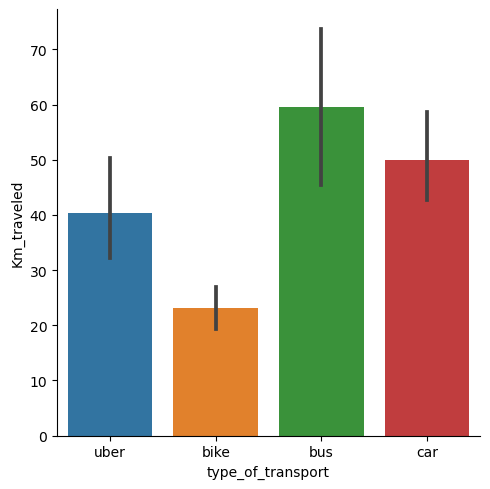

In [6]:
# Visualisation of catplot version : conversion rate with 95% confidence level
_ = sns.catplot(x="type_of_transport", y="Km_traveled", data = df, kind="bar")

As you can see the black lines at the end of each bar represent your confidence interval. Meaning your true mean lies between these lines. Now, let's see how we can reduce this confidence interval.

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\phili\AppData\Local\Temp\ipykernel_27540\92154238.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 80)` for the same effect.

  sns.catplot(x="type_of_transport"

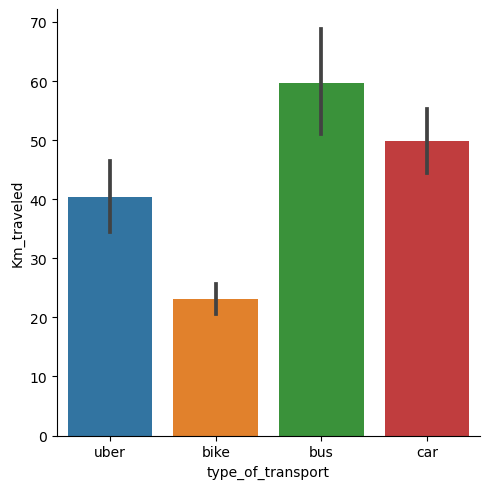

In [7]:
### Let's reduce the confidence level to 85%
sns.catplot(x="type_of_transport", y="Km_traveled", data = df, kind="bar", ci=80)

Now we set up a confidence level $\alpha = 0.15$ and now we have way lower confidence intervals ! 

## Confidence intervals with category in columns 

Now as a final note, your dataset won't always look like the one above. Sometimes, your categories will be in column just like the below dataset:

In [9]:
df = pd.read_csv("../assets/Python/km_traveled_per_transport.csv").iloc[:,1:]
df.head(3)

,bike,bus,car,uber
0,21,75,55,22
1,30,87,34,34
2,17,49,38,38


Now you will need to do a little bit more of manual work by selecting a `t-value` yourself and then specify it within a `.plot` function in `pandas`

👋  as a reminder, you need to compute the margin of error. Here is the formula for mean: 

$$E = t \frac{s}{\sqrt{n}}$$

In [10]:
# df.groupby("type_of_transport").mean()
df.mean(axis=0)

bike    23.125
bus     59.625
car     49.875
uber    40.375
dtype: float64

<Axes: >

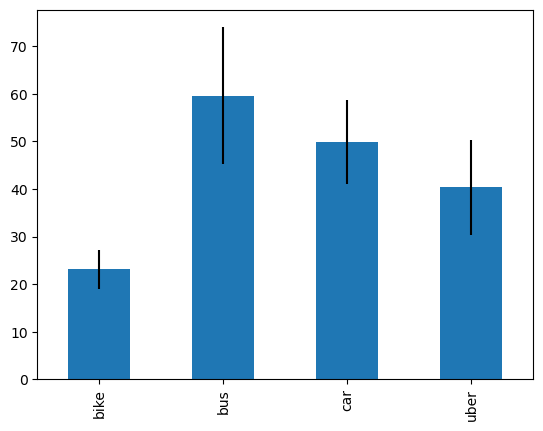

In [11]:
# with confidence level at 0.9
t_value=1.96
sigma = df.std()
n = len(df)
E = t_value * sigma / np.sqrt(n)

# Bug : Y a pas de type_of_transport donc grouby peut pas fonctionner 
# df.groupby("type_of_transport").mean().plot(yerr=E, kind="bar")
df.mean(axis=0).plot(yerr=E, kind="bar")

## Resources 📚📚

- Simple barplot of column means using seaborn  - [https://bit.ly/2JLmv1Sv](https://stackoverflow.com/questions/50337237/simple-barplot-of-column-means-using-seaborn)

- pandas.DataFrame.plot - [https://bit.ly/30CAS](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)

- Add 95% confidence intervals as error bars to pandas bar plot - [https://bit.ly/30CSAq](https://stackoverflow.com/questions/56776919/add-95-confidence-intervals-as-error-bars-to-pandas-bar-plot)
